<img src="im_note/AC-logo.png" alt="Drawing" style="width: 200px;"/> <img src="im_note/logo.png" alt="Drawing" style="width: 150px;"/> 
<img src="im_note/logo3.png" alt="Drawing" style="width: 350px;"/><img src="im_note/GCRF.png" alt="Drawing" style="width: 150px;"/>

# Using gaussian processes to forecast VCI

#### -GPs for time series: http://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf
#### -We use Pyro for our GP fit: http://pyro.ai/examples/gp.html

In [1]:
import plot_func # the functions we use in this notebook

<img src="im_note/livelihood_zones1.png" alt="Drawing" style="width: 650px;"/> 

<b>We used Landsat to derive weekly NDVI ($\rm{NDVI} = \frac{NIR- red}{NIR+red}$) values for a 1000 randomly selected pixels for all the Pastoral Livelihood-zone county cross sections in Kenya. From the NDVI we dirive the weekly VCI ($\rm{VCI}_i = 100 \times \frac{\rm{NDVI}_i - \rm{NDVI}_{min,i}}{ \rm{NDVI}_{max,i} - \rm{NDVI}_{min,i}}$).<b>

<b>This example is for the county livelihood zone intersection.</b>


In [2]:
region = plot_func.which_region()

Choose 0 for: Baringo_Z24
Choose 1 for: Isiolo_Z10


Please select a region:  0


You have choosen: Baringo_Z24


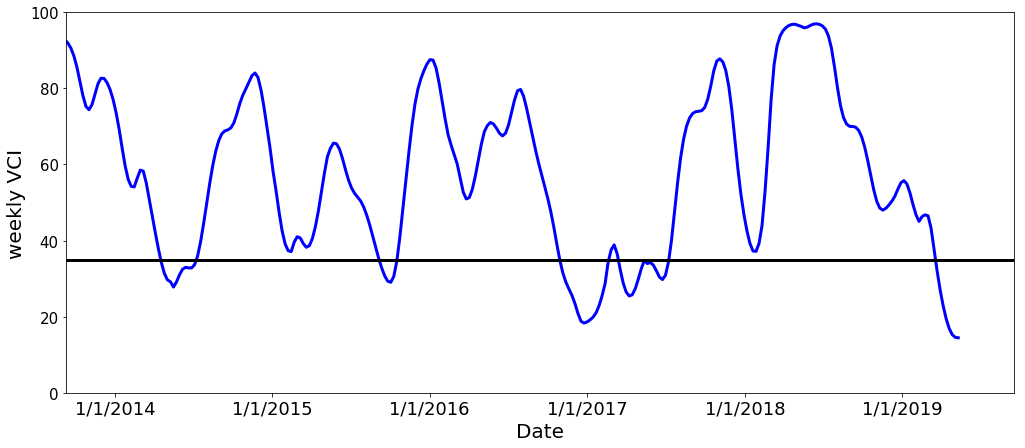

In [3]:
X,y = plot_func.load(region) # X = days since 1/1/2000
plot_func.plot_vci(X,y)                                 # y = VCI as measured by Landsat

In [4]:
# training the GP, using an RBF kernel on X and y
# mean contains the GP prediction at week Xtest_use
mean, Xtest_use = plot_func.run_GP(X,y)

#### Testing our code, dotted line is 2 week forecast. See Barrett, Duivenvoorden and Salkapi et al. in prep
<img src="im_note/NDVI.png" alt="Drawing" style="width: 1150px;"/> 

#### The next plot will show the VCI predictions in red. We use the GP to estimate the VCI at every week (X) where we have a VCI observation (y). We also use the GP to predict the VCI 1 to 8 weeks ahead. 

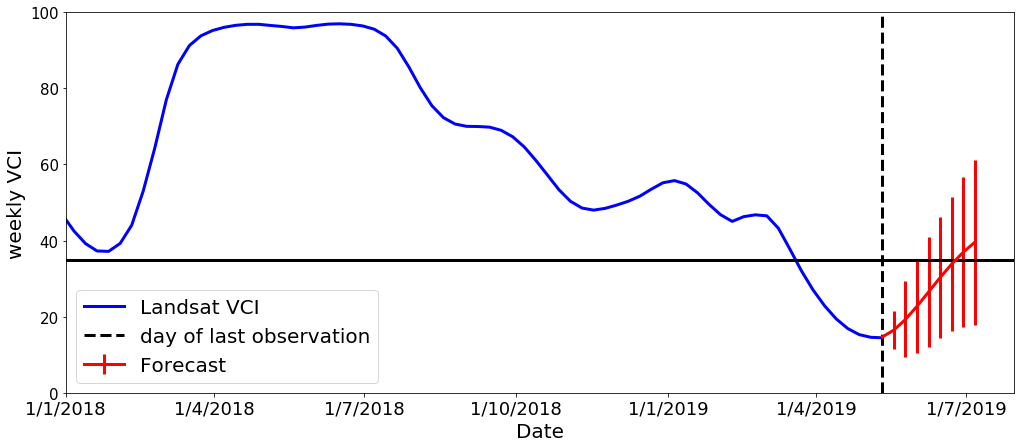

weeks =  1 ,   VCI =  16
weeks =  2 ,   VCI =  19
weeks =  3 ,   VCI =  23
weeks =  4 ,   VCI =  26
weeks =  5 ,   VCI =  30
weeks =  6 ,   VCI =  34
weeks =  7 ,   VCI =  37
weeks =  8 ,   VCI =  40


In [5]:
plot_func.plot_vci_fc(Xtest_use,mean,X,y)

#### A 3 month average VCI is currently being used as a drought indicator by NDMA, we convert our weekly VCI to VCI3M by taking the average VCI over the last 3 month period.

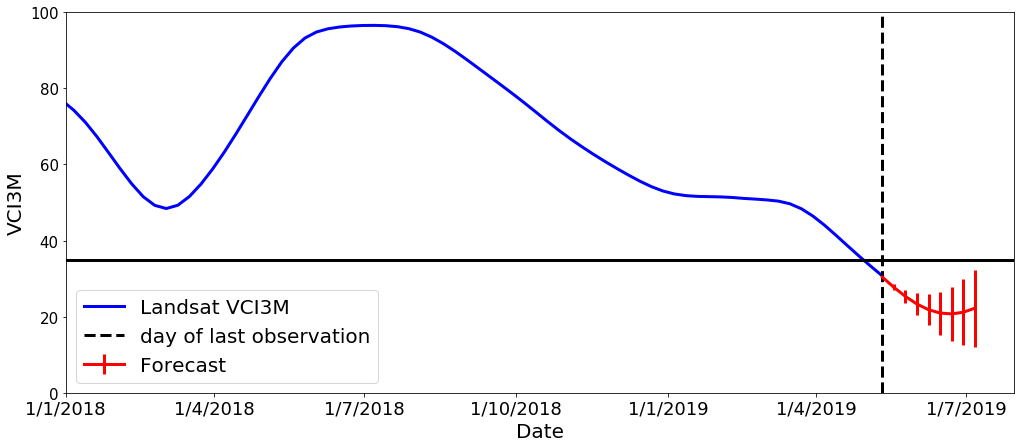

weeks  =  1 ,   VCI3M =  28
weeks  =  2 ,   VCI3M =  25
weeks  =  3 ,   VCI3M =  23
weeks  =  4 ,   VCI3M =  22
weeks  =  5 ,   VCI3M =  21
weeks  =  6 ,   VCI3M =  21
weeks  =  7 ,   VCI3M =  21
weeks  =  8 ,   VCI3M =  22


In [6]:
import importlib
importlib.reload(plot_func)
plot_func.plot_vci_fc3M(Xtest_use,mean,X,y)

<b>To demonstrate forecasting for another region, we now show a plot of 3 month VCI for another region:</b>

In [7]:
region = plot_func.which_region()

Choose 0 for: Baringo_Z24
Choose 1 for: Isiolo_Z10


Please select a region:  1


You have choosen: Isiolo_Z10


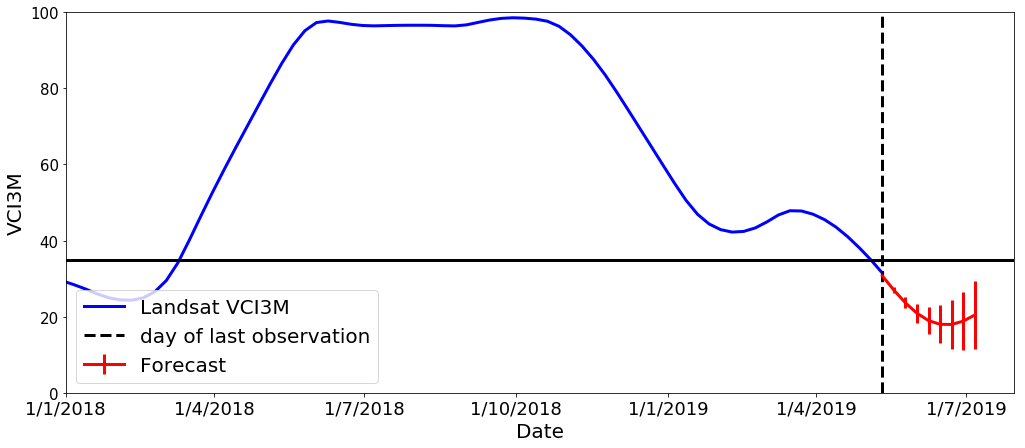

weeks  =  1 ,   VCI3M =  27
weeks  =  2 ,   VCI3M =  24
weeks  =  3 ,   VCI3M =  21
weeks  =  4 ,   VCI3M =  19
weeks  =  5 ,   VCI3M =  18
weeks  =  6 ,   VCI3M =  18
weeks  =  7 ,   VCI3M =  19
weeks  =  8 ,   VCI3M =  20


In [8]:
import importlib
importlib.reload(plot_func)
X,y = plot_func.load(region)
mean, Xtest_use = plot_func.run_GP(X,y)
plot_func.plot_vci_fc3M(Xtest_use,mean,X,y)